In [1]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset.

df_games = pd.read_csv('board_games.csv')

Scenario:  
  
You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
  
Each answer MUST have a separate visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must generated using python.  
   
The companies CTO also requires you to rationalize all the decisions that you have made in your report.   
  
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   


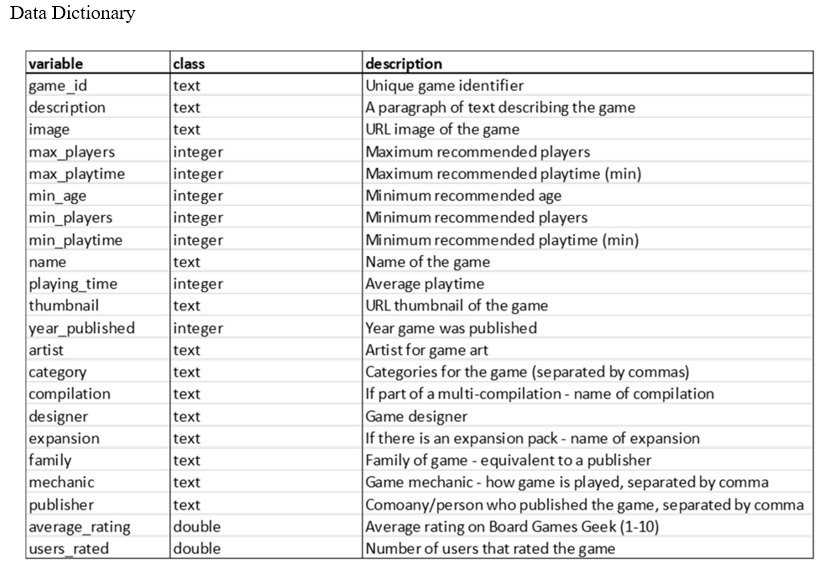

In [3]:
# Data Dictionary
from IPython.display import Image
Image(filename =r'Data_Dictionary.jpg')

In [4]:
df_games.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [5]:
df_games.shape

(10532, 22)

In [6]:
df_games.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,2003.070832,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,12.278296,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,1998.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


In [7]:
df_games.describe(include=object)

,description,image,name,thumbnail,artist,category,compilation,designer,expansion,family,mechanic,publisher
count,10532,10531,10532,10531,7759,10438,410,10406,2752,7724,9582,10529
unique,10528,10527,10357,10527,4641,3860,336,4678,2634,3918,3209,5512
top,How could that have happened? Black Stories ar...,//cf.geekdo-images.com/images/pic2410035.png,Robin Hood,//cf.geekdo-images.com/images/pic2410035_t.png,Franz Vohwinkel,"Wargame,World War II","Traveller: The Classic Games, Games 1-6+",(Uncredited),"Règlement de l'An XXX,Regulations of the Year ...",Crowdfunding: Kickstarter,Hex-and-Counter,GMT Games
freq,3,2,5,2,166,449,8,558,7,391,523,180


In [8]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [9]:
num_nulls = df_games.isna().sum()
print(num_nulls)

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64


## Part 1: (Column Names are denoted by quotation marks)
  
•	What are the top 5 “average rated” games?

•	Is there a correlation between the “users_rated” and the “max_playtime”?

•	What is the distribution of game categories? (You may not use a barchart)

•	Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?

•	What are the 5 most common “mechanics” in the dataset?

### What are the top 5 “average rated” games?

Data Table with the top 5 games with “average rating” are:
                                              name  average_rating
0                     Small World Designer Edition         9.00392
1                           Kingdom Death: Monster         8.93184
2                           Terra Mystica: Big Box         8.84862
3                         Last Chance for Victory          8.84603
4  The Greatest Day: Sword, Juno, and Gold Beaches         8.83081


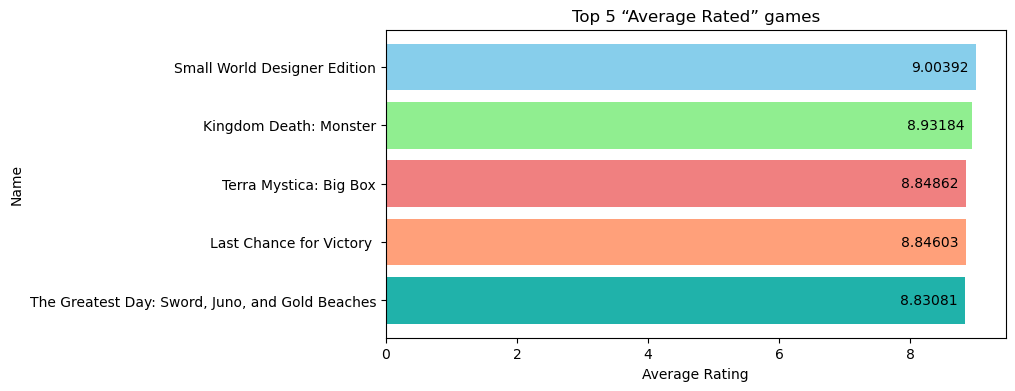

In [10]:
# Top 5 “average rated” games
df_games_top_5 = df_games[['name', 'average_rating']]

df_games_top_5 = df_games_top_5.sort_values(by='average_rating', ascending=False)

top_5 = df_games_top_5.head(5)

# Data Table
data = {'name': ['Small World Designer Edition', 'Kingdom Death: Monster', 'Terra Mystica: Big Box', 
                 'Last Chance for Victory ', 'The Greatest Day: Sword, Juno, and Gold Beaches'],
        'average_rating': [9.00392, 8.93184, 8.84862, 8.84603, 8.83081]}

top_5 = pd.DataFrame(data)

print("Data Table with the top 5 games with “average rating” are:")
print(top_5)

# Visualization
plt.figure(figsize=(8, 4))  
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen'] 

bars = plt.barh(top_5['name'], top_5['average_rating'], color=colors)  

for bar, rating in zip(bars, top_5['average_rating']):
    plt.text(bar.get_width() - 0.99, bar.get_y() + bar.get_height() / 2, f'{rating}', va='center')

plt.xlabel('Average Rating')
plt.ylabel('Name')
plt.title('Top 5 “Average Rated” games')
plt.gca().invert_yaxis()
plt.show()

### Is there a correlation between the “users_rated” and the “max_playtime”?

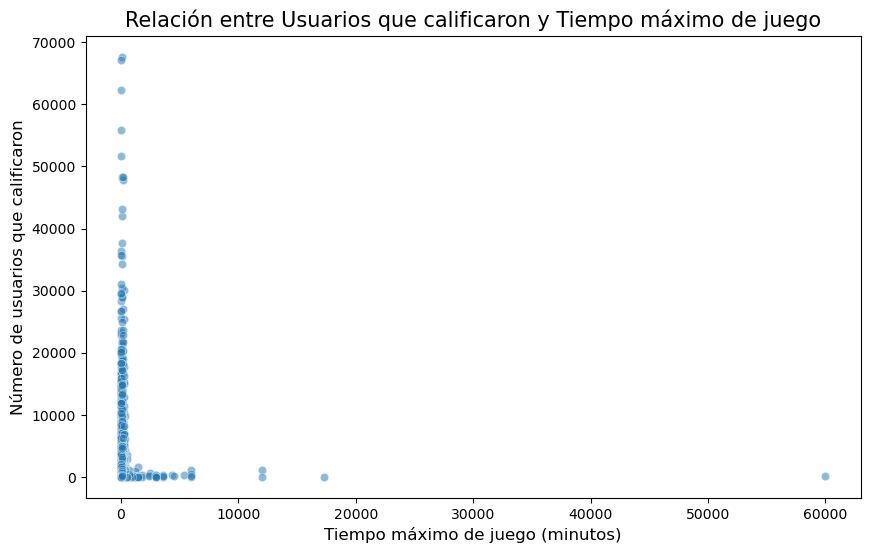

-0.00434164733377671

In [11]:
# Calculamos el coeficiente de correlación de Pearson entre 'users_rated' y 'max_playtime'
correlation = df_games['users_rated'].corr(df_games['max_playtime'])

# Visualizamos la correlación con un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_games['max_playtime'], y=df_games['users_rated'], alpha=0.5)
plt.title('Relación entre Usuarios que calificaron y Tiempo máximo de juego', fontsize=15)
plt.xlabel('Tiempo máximo de juego (minutos)', fontsize=12)
plt.ylabel('Número de usuarios que calificaron', fontsize=12)
plt.show()

correlation

### What is the distribution of game categories? (You may not use a barchart)

In [12]:
# Verificar la cantidad de valores nulos en la columna "category"
null_count = df_games["category"].isnull().sum()

null_count

94

In [13]:
# 1. Limpieza de datos: Reemplazar valores nulos por "Unknown"
df_games["category"].fillna("Unknown", inplace=True)

In [14]:
# Lower case
df_games["category"] = df_games["category"].apply(lambda x: " ".join(x.lower() for x in x.split())) 
df_games["category"].head() 

0    economic,negotiation,political
1                 card game,fantasy
2        abstract strategy,medieval
3                           ancient
4                          economic
Name: category, dtype: object

In [15]:
# Removing/Replace Punctuation
df_games["category"] = df_games["category"].str.replace(',', ' ')
df_games["category"].head()

0    economic negotiation political
1                 card game fantasy
2        abstract strategy medieval
3                           ancient
4                          economic
Name: category, dtype: object

In [16]:
# Removal of Stop Words
from nltk.corpus import stopwords 
stop = stopwords.words('english') 
df_games["category"] = df_games["category"].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
df_games["category"].head() 

0    economic negotiation political
1                 card game fantasy
2        abstract strategy medieval
3                           ancient
4                          economic
Name: category, dtype: object

In [17]:
# Common word removal
freq = pd.Series(' '.join(df_games["category"]).split()).value_counts()[:20] 
freq

game          4913
card          2981
wargame       2034
/             1996
fantasy       1218
war           1052
fighting       900
economic       878
science        850
fiction        850
dice           838
party          833
world          793
abstract       710
strategy       710
children's     704
ii             676
bluffing       655
theme          630
humor          580
dtype: int64

In [18]:
# Removing/Replace Slash
df_games["category"] = df_games["category"].str.replace('/', ' ')
df_games["category"].head()

0    economic negotiation political
1                 card game fantasy
2        abstract strategy medieval
3                           ancient
4                          economic
Name: category, dtype: object

In [19]:
# Common word removal
freq = pd.Series(' '.join(df_games["category"]).split()).value_counts()[:10] 
freq

game        4913
card        2981
wargame     2034
fantasy     1218
war         1052
fighting     900
economic     878
science      850
fiction      850
dice         838
dtype: int64

In [20]:
# Rare words removal
freq = pd.Series(' '.join(df_games["category"]).split()).value_counts()[-10:] 
freq

medical      31
vietnam      29
pike         27
shot         27
system       22
wars         15
indian       15
korean       14
expansion    11
base-game    11
dtype: int64

In [21]:
# Spelling correction
from textblob import TextBlob 
df_games["category"][:5].apply(lambda x: str(TextBlob(x).correct()))

0    economic negotiation political
1                 card game fantasy
2        abstract strategy medieval
3                           ancient
4                          economic
Name: category, dtype: object

In [22]:
# Tokenization
categories_tokenized = df_games["category"].str.split(',')
categories_tokenized.head()

0    [economic negotiation political]
1                 [card game fantasy]
2        [abstract strategy medieval]
3                           [ancient]
4                          [economic]
Name: category, dtype: object

Stemming

from nltk.stem import PorterStemmer

st = PorterStemmer()

df_games["category"][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()])) 


In [23]:
# Lemmatization
from textblob import Word 
df_games["category"] = df_games["category"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
df_games["category"].head() 

0    economic negotiation political
1                 card game fantasy
2        abstract strategy medieval
3                           ancient
4                          economic
Name: category, dtype: object

La columna "category" contiene etiquetas de categorías para cada juego, y estas etiquetas son palabras clave que describen el tipo o género del juego. Dado que estas etiquetas son discretas y no requieren una comprensión profunda del contexto, no es necesario utilizar modelos complejos como BERT o LSTM.

Para la columna "category", las siguientes técnicas de vectorización serían las más adecuadas:

One-Hot Encoding:

Es simple y efectivo para categorías discretas.
Cada categoría se representa como un vector binario.
Es útil cuando las categorías no tienen un orden inherente.

Bag of Words (BoW):

Es útil si algunas entradas tienen múltiples categorías (por ejemplo, "Estrategia,Aventura").
Cada palabra o etiqueta se cuenta y se representa como un vector.

TF-IDF:

Similar a BoW, pero da más peso a las categorías que son raras y menos peso a las categorías que aparecen con frecuencia en todo el dataset.
Puede ser útil si ciertas categorías son muy comunes y otras son raras, y quieres dar más importancia a las raras.

n-grams:

Puede ser útil si hay categorías compuestas por más de una palabra y el orden de las palabras es importante (por ejemplo, "juego de cartas" vs. "juego de mesa").

Dado que las categorías suelen ser términos discretos y no frases largas, el uso de n-grams podría no ser tan relevante en este caso.

Para tu dataset y específicamente para la columna "category", One-Hot Encoding o BoW serían las opciones más adecuadas, ya que proporcionan una representación simple y eficaz de las categorías. Si decides dar más importancia a las categorías menos comunes, entonces TF-IDF podría ser una buena elección. Sin embargo, dado que cada juego puede pertenecer a múltiples categorías, el enfoque de BoW sería el más intuitivo para comenzar.

#### Bag of Words (BoW)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Instanciar CountVectorizer
vectorizer = CountVectorizer()

# Ajustar y transformar la columna "category"
X = vectorizer.fit_transform(df_games["category"])

# Convertir la matriz dispersa en un dataframe para visualizar
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar las primeras filas del dataframe resultante
df_bow.head()

,abstract,action,adult,adventure,age,agent,american,ancient,animal,arabian,...,unknown,video,vietnam,war,warfare,wargame,west,word,world,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Sumar las columnas del dataframe
category_counts = df_bow.sum(axis=0)

# Ordenar los resultados de mayor a menor
sorted_category_counts = category_counts.sort_values(ascending=False)

# Mostrar los resultados
print(sorted_category_counts)

game         4924
card         2981
wargame      2034
fantasy      1218
war          1067
             ... 
system         22
indian         15
korean         14
base           11
expansion      11
Length: 108, dtype: int64


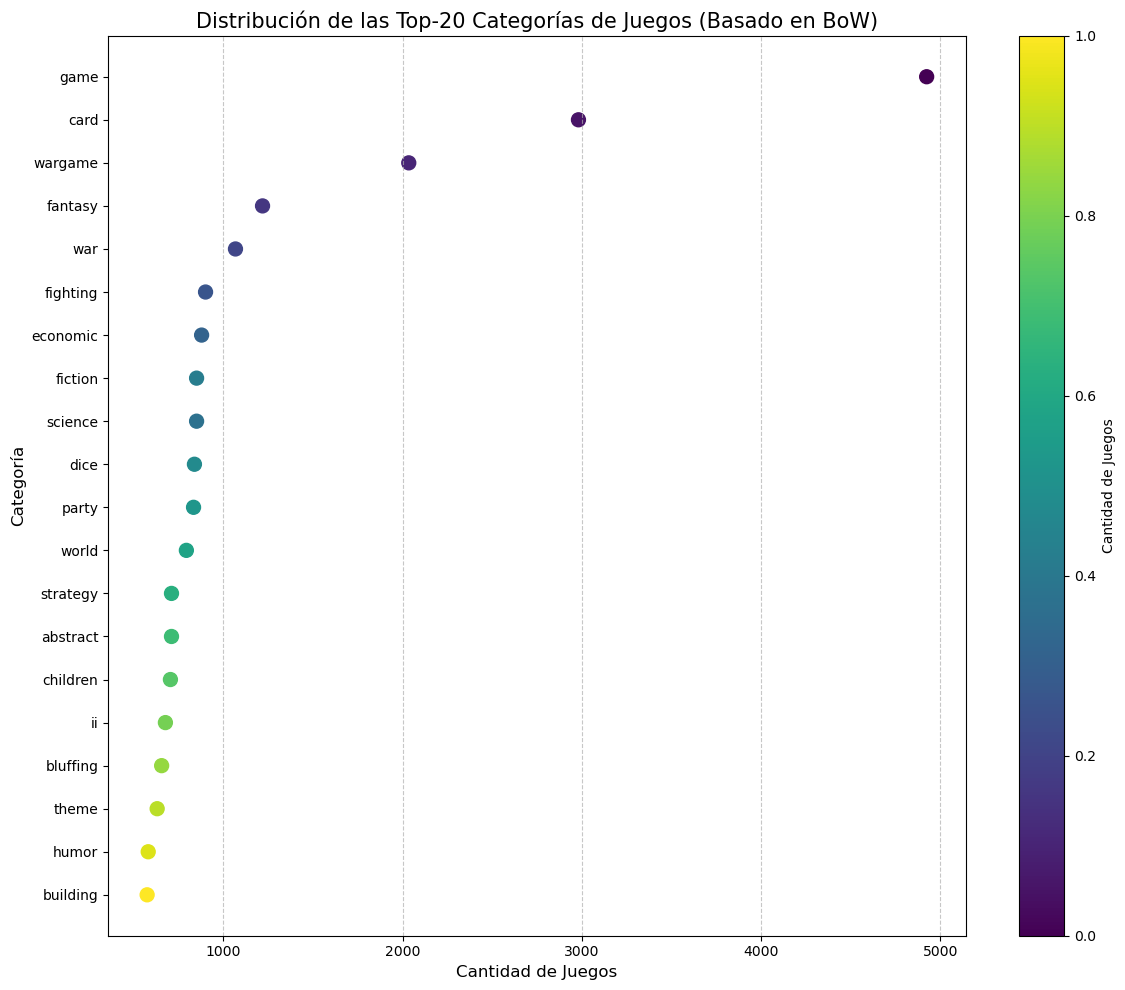

In [26]:
import numpy as np

# Sumar las columnas para obtener la cantidad total de juegos en cada categoría
category_counts = df_bow.sum().sort_values(ascending=False)

# Graficamos las 20 categorías principales
top_20_categories = category_counts.head(20)
counts = top_20_categories.values
categories = top_20_categories.index

# Cambiar el color de los puntos en función de su valor, siendo el mayor más oscuro
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))

# Ordenar los puntos según su valor para que el color coincida con el orden
sorted_indices = counts.argsort()
sorted_counts = counts[sorted_indices]
sorted_categories = categories[sorted_indices]
sorted_colors = colors[sorted_indices]

# Crear el Dot Plot con colores, usando el análisis previamente realizado
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))
sorted_indices = counts.argsort()
sorted_counts = counts[sorted_indices]
sorted_categories = categories[sorted_indices]
sorted_colors = colors[sorted_indices]

plt.figure(figsize=(12, 10))
plt.scatter(sorted_counts, sorted_categories, color=sorted_colors, s=100)
plt.title('Distribución de las Top-20 Categorías de Juegos (Basado en BoW)', fontsize=15)
plt.xlabel('Cantidad de Juegos', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.colorbar(label='Cantidad de Juegos')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### One-Hot Encoding

In [27]:
# Aplicar One-Hot Encoding a la columna "category"
category_onehot_new = df_games["category"].str.get_dummies(sep=',')
category_onehot_new.head()

,abstract strategy,abstract strategy action dexterity,abstract strategy action dexterity book card game deduction dice negotiation word game,abstract strategy action dexterity children's game,abstract strategy action dexterity children's game dice fantasy,abstract strategy action dexterity children's game puzzle,abstract strategy action dexterity deduction puzzle,abstract strategy action dexterity dice game system,abstract strategy action dexterity dice memory puzzle,abstract strategy action dexterity maze,...,unknown,video game theme,vietnam war wargame,wargame,wargame world war,wargame world war ii,word game,world war,world war ii,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Sumar las columnas para obtener la cantidad total de juegos en cada categoría
category_distribution_onehot = category_onehot_new.sum().sort_values(ascending=False)

category_distribution_onehot.head(20)

wargame world war ii          449
card game                     438
abstract strategy             284
napoleonic wargame            124
economic                      116
card game fantasy             110
dice                          107
american civil war wargame     97
unknown                        94
modern warfare wargame         89
party game                     77
ancient wargame                75
science fiction wargame        66
action dexterity               55
fantasy                        54
wargame world war              54
medieval                       51
party game trivia              47
animal card game               46
city building                  43
dtype: int64

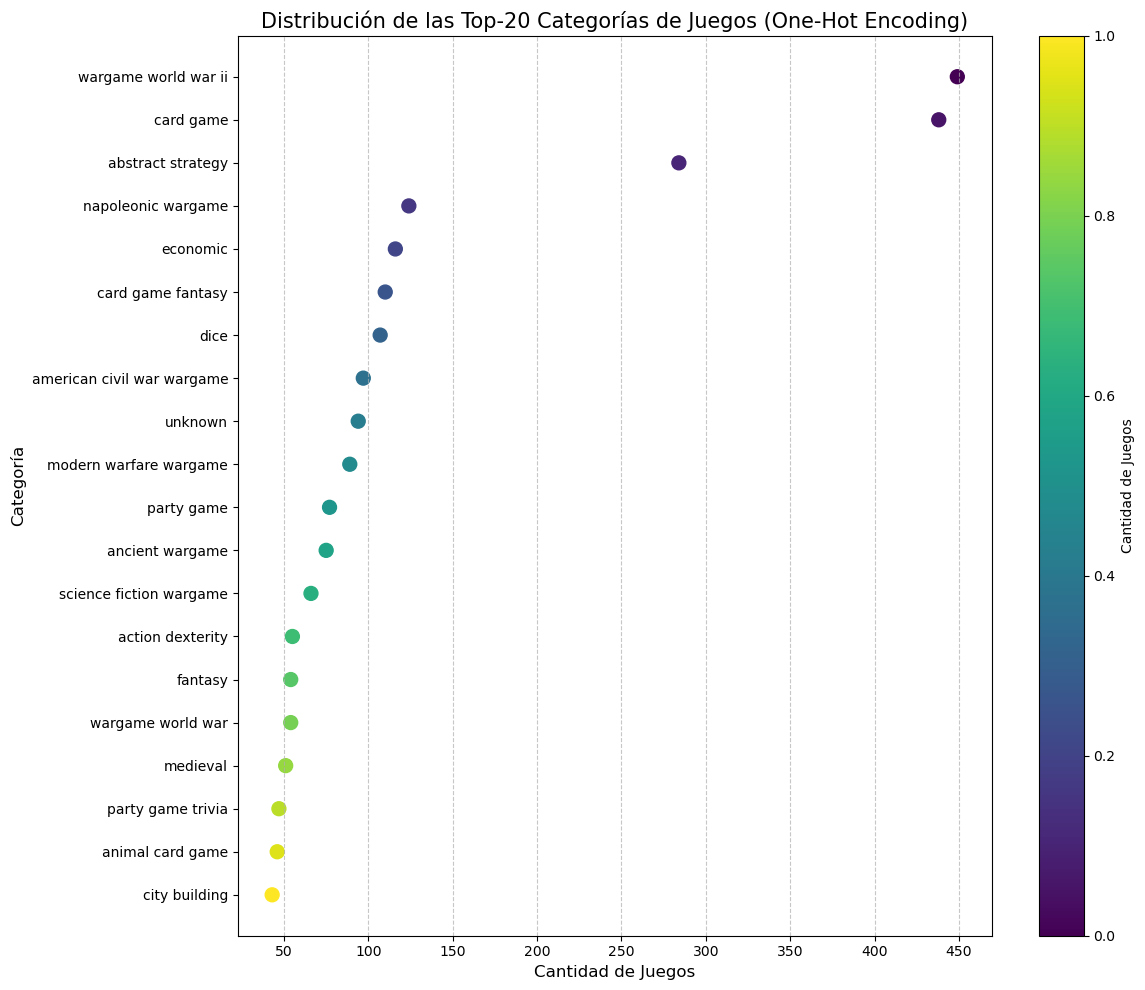

In [29]:
# Tomamos las top-20 categorías y sus respectivas cantidades para One-Hot Encoding
top_20_categories_onehot = category_distribution_onehot.head(20)
counts_onehot = top_20_categories_onehot.values
categories_onehot = top_20_categories_onehot.index

# Cambiar el color de los puntos en función de su valor, siendo el mayor más oscuro
colors_onehot = plt.cm.viridis(np.linspace(0, 1, len(counts_onehot)))

# Ordenar los puntos según su valor para que el color coincida con el orden
sorted_indices_onehot = counts_onehot.argsort()
sorted_counts_onehot = counts_onehot[sorted_indices_onehot]
sorted_categories_onehot = categories_onehot[sorted_indices_onehot]
sorted_colors_onehot = colors_onehot[sorted_indices_onehot]

# Crear el Dot Plot con colores
plt.figure(figsize=(12, 10))
plt.scatter(sorted_counts_onehot, sorted_categories_onehot, color=sorted_colors_onehot, s=100)
plt.title('Distribución de las Top-20 Categorías de Juegos (One-Hot Encoding)', fontsize=15)
plt.xlabel('Cantidad de Juegos', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.colorbar(label='Cantidad de Juegos')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instanciar el TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Ajustar y transformar la columna "category" con TF-IDF Vectorizer
X_tfidf = tfidf_vectorizer.fit_transform(df_games["category"])

# Convertir la matriz dispersa en un dataframe para visualizar
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

df_tfidf.head()

,abstract,action,adult,adventure,age,agent,american,ancient,animal,arabian,...,unknown,video,vietnam,war,warfare,wargame,west,word,world,zombie
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.562558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Sumar las columnas para obtener la importancia total de cada categoría
tfidf_distribution = df_tfidf.sum().sort_values(ascending=False)

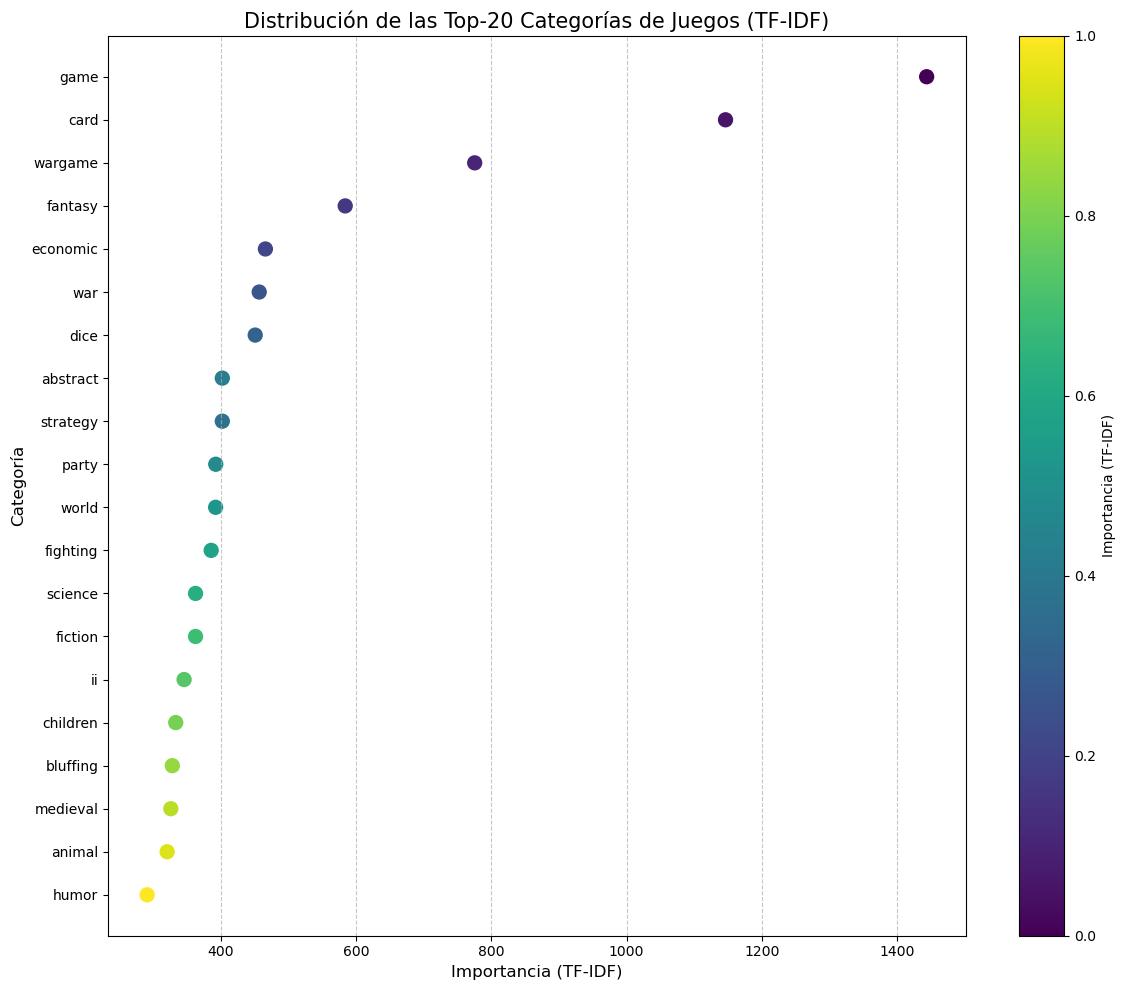

In [32]:
# Tomamos las top-20 categorías y sus respectivas importancias
top_20_categories_tfidf = tfidf_distribution.head(20)
counts_tfidf = top_20_categories_tfidf.values
categories_tfidf = top_20_categories_tfidf.index

# Cambiar el color de los puntos en función de su valor, siendo el mayor más oscuro
colors_tfidf = plt.cm.viridis(np.linspace(0, 1, len(counts_tfidf)))

# Ordenar los puntos según su valor para que el color coincida con el orden
sorted_indices_tfidf = counts_tfidf.argsort()
sorted_counts_tfidf = counts_tfidf[sorted_indices_tfidf]
sorted_categories_tfidf = categories_tfidf[sorted_indices_tfidf]
sorted_colors_tfidf = colors_tfidf[sorted_indices_tfidf]

# Crear el Dot Plot con colores
plt.figure(figsize=(12, 10))
plt.scatter(sorted_counts_tfidf, sorted_categories_tfidf, color=sorted_colors_tfidf, s=100)
plt.title('Distribución de las Top-20 Categorías de Juegos (TF-IDF)', fontsize=15)
plt.xlabel('Importancia (TF-IDF)', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.colorbar(label='Importancia (TF-IDF)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?

In [33]:
# Dividimos el dataframe en dos grupos: juegos antiguos (1992 y anteriores) y juegos nuevos (después de 1992)
older_games = df_games[df_games['year_published'] <= 1992]
newer_games = df_games[df_games['year_published'] > 1992]

# Calculamos la mediana de la calificación promedio para cada grupo
median_rating_older = older_games['average_rating'].median()
median_rating_newer = newer_games['average_rating'].median()

median_rating_older, median_rating_newer

(6.08812, 6.462915)

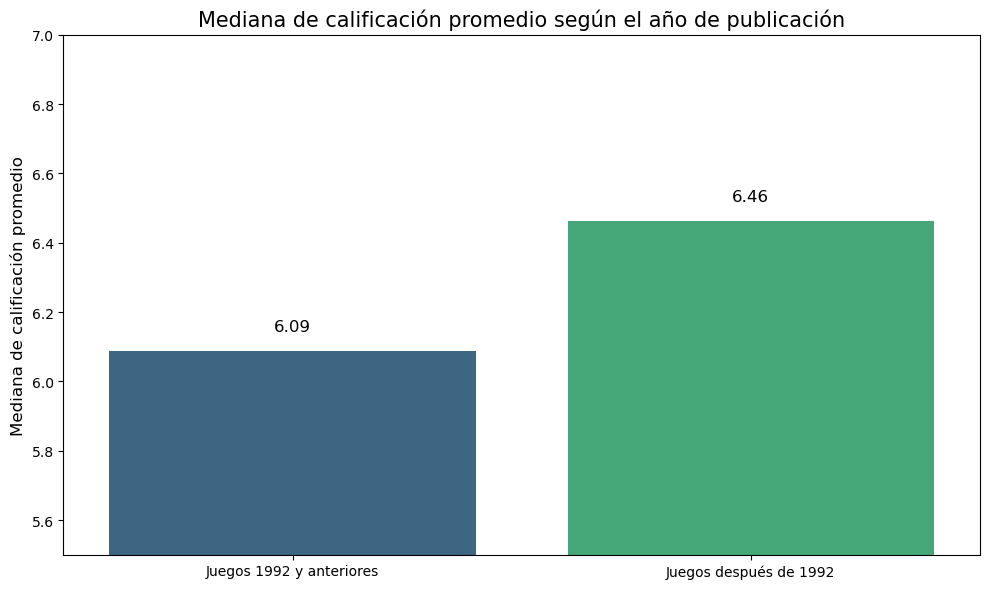

In [34]:
# Visualización de las medianas de calificación promedio para juegos antiguos y nuevos
labels = ['Juegos 1992 y anteriores', 'Juegos después de 1992']
medians = [median_rating_older, median_rating_newer]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=medians, palette='viridis')
plt.title('Mediana de calificación promedio según el año de publicación', fontsize=15)
plt.ylabel('Mediana de calificación promedio', fontsize=12)
plt.ylim(5.5, 7)

# Mostrar las medianas exactas en las barras
for i, v in enumerate(medians):
    plt.text(i, v + 0.05, "{:.2f}".format(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### What are the 5 most common “mechanics” in the dataset?

In [35]:
# Tokenización: Separamos las mecánicas, ya que un juego puede tener múltiples mecánicas (separadas por comas)
mechanics_tokenized = df_games['mechanic'].str.split(',', expand=True).stack().reset_index(drop=True)

# Contamos la frecuencia de cada mecánica
mechanics_counts = mechanics_tokenized.value_counts()

# Tomamos las 5 mecánicas más comunes
top_5_mechanics = mechanics_counts.head(5)
top_5_mechanics

Dice Rolling              2438
Hand Management           2176
Set Collection            1347
Hex-and-Counter           1244
Variable Player Powers    1223
dtype: int64

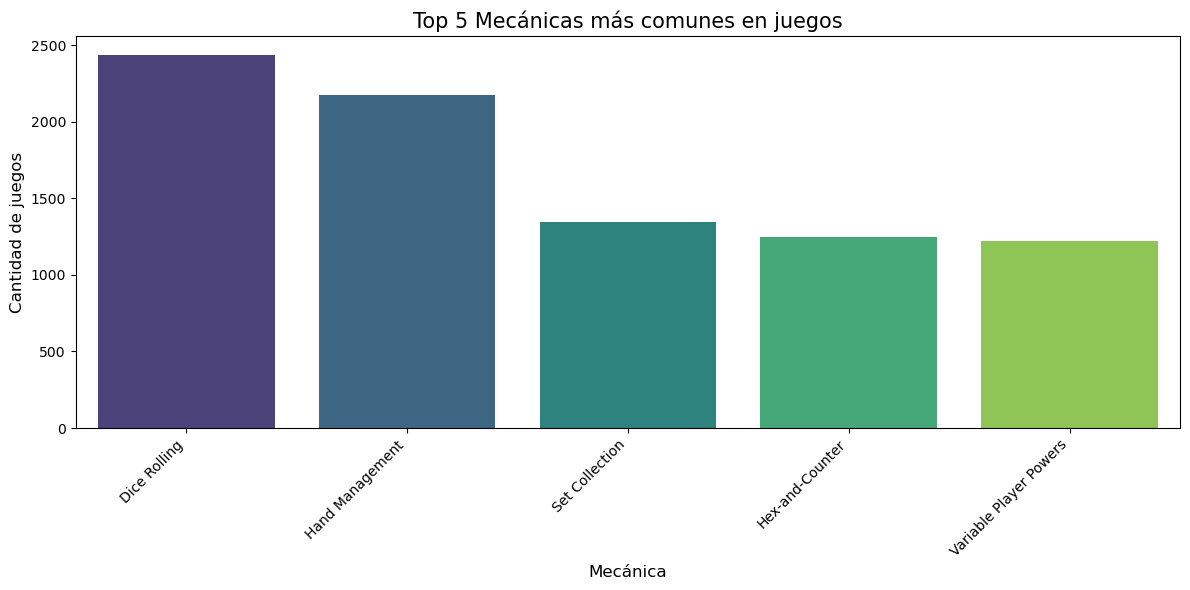

In [36]:
# Visualización de las 5 mecánicas más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_mechanics.index, y=top_5_mechanics.values, palette='viridis')
plt.title('Top 5 Mecánicas más comunes en juegos', fontsize=15)
plt.xlabel('Mecánica', fontsize=12)
plt.ylabel('Cantidad de juegos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Part 2

### You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  

"¿Los juegos que tienen una duración de juego promedio (playing_time) más larga tienden a tener una calificación promedio (average_rating) más alta?"

Los juegos con una duración de juego más larga a menudo se perciben como más estratégicos o inmersivos, lo que podría influir en las percepciones de calidad y, por lo tanto, en las calificaciones. Si esta hipótesis es cierta, la empresa podría considerar promocionar más juegos de duración más larga durante la temporada de invierno, cuando las personas pueden estar más dispuestas a dedicar tiempo a juegos de mesa más largos y envolventes.

Para responder a esta pregunta, realizaremos un análisis exploratorio visualizando la relación entre "playing_time" y "average_rating". También calcularemos el coeficiente de correlación para cuantificar la relación entre estas dos variables.

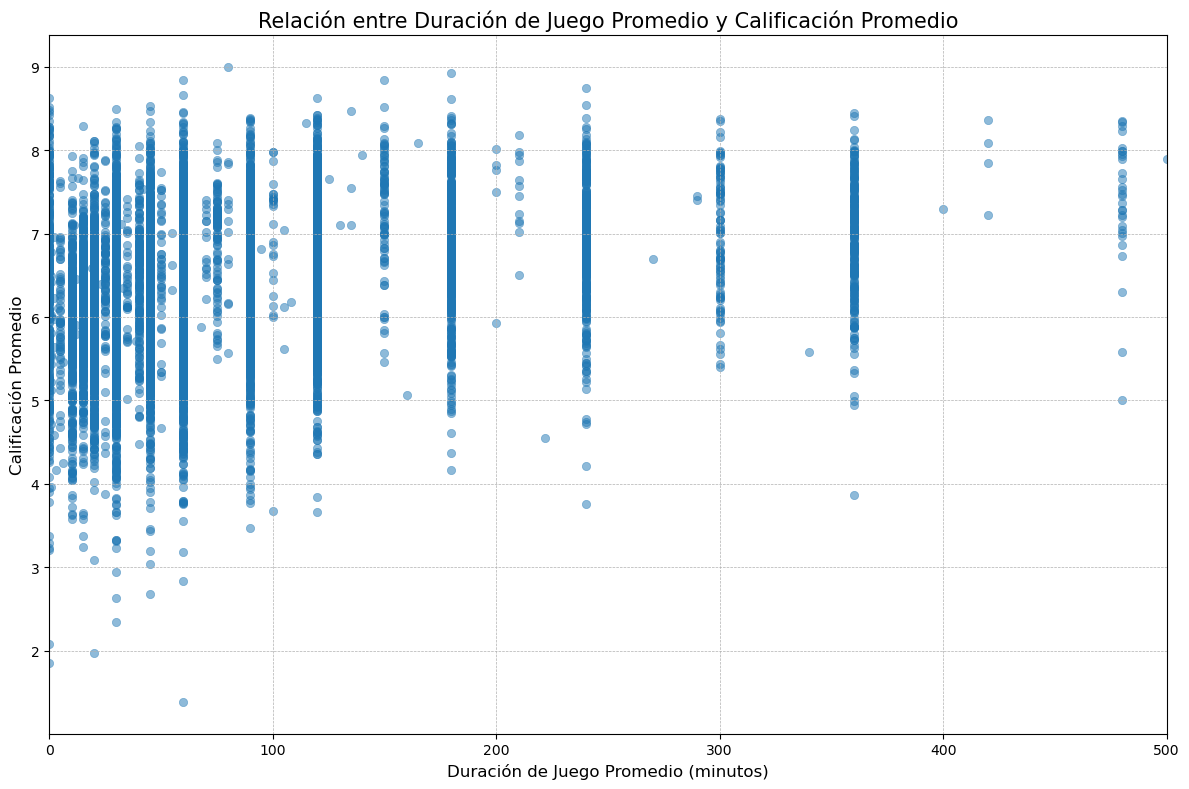

0.056439379682859996

In [37]:
# Visualización de la relación entre playing_time y average_rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_games['playing_time'], y=df_games['average_rating'], alpha=0.5, edgecolor=None)
plt.title('Relación entre Duración de Juego Promedio y Calificación Promedio', fontsize=15)
plt.xlabel('Duración de Juego Promedio (minutos)', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xlim(0, 500)  # Limitamos el eje x para visualizar mejor la mayoría de los puntos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calcular el coeficiente de correlación entre playing_time y average_rating
correlation_coefficient_df_games = df_games['playing_time'].corr(df_games['average_rating'])
correlation_coefficient_df_games

La visualización muestra la relación entre la "Duración de Juego Promedio" y la "Calificación Promedio". Como puedes ver, hay una variedad de puntos dispersos, pero no parece haber una tendencia clara que indique que juegos con una mayor duración tienen necesariamente una calificación más alta. La mayoría de los juegos tienen una duración de menos de 500 minutos.

El coeficiente de correlación entre "playing_time" y "average_rating" es aproximadamente 
0.0564. Este valor es cercano a 0, lo que indica una correlación débil entre estas dos variables.

Conclusión:
La duración del juego y la calificación promedio tienen una correlación débil, lo que sugiere que no hay una relación fuerte entre la duración del juego y su calificación promedio. Por lo tanto, la duración del juego por sí sola no sería un buen indicador para predecir la popularidad o la calidad percibida de un juego.

"¿Existe una relación entre la edad mínima recomendada ("min_age") de un juego y su calificación promedio ("average_rating")? En otras palabras, ¿los juegos destinados a un público más maduro tienden a tener calificaciones más altas?"

Justificación:
La edad recomendada de un juego puede estar relacionada con la complejidad, el tema o el contenido del juego. Los juegos destinados a audiencias más maduras podrían ser percibidos como más estratégicos, desafiantes o inmersivos, lo que podría influir en las calificaciones. Si esta hipótesis es cierta, la empresa podría considerar promocionar más juegos destinados a audiencias maduras durante la temporada de invierno, cuando las personas podrían estar buscando juegos más sofisticados para jugar en interiores.

Para responder a esta pregunta, realizaremos un análisis exploratorio visualizando la relación entre "min_age" y "average_rating". También calcularemos el coeficiente de correlación para cuantificar la relación entre estas dos variables.

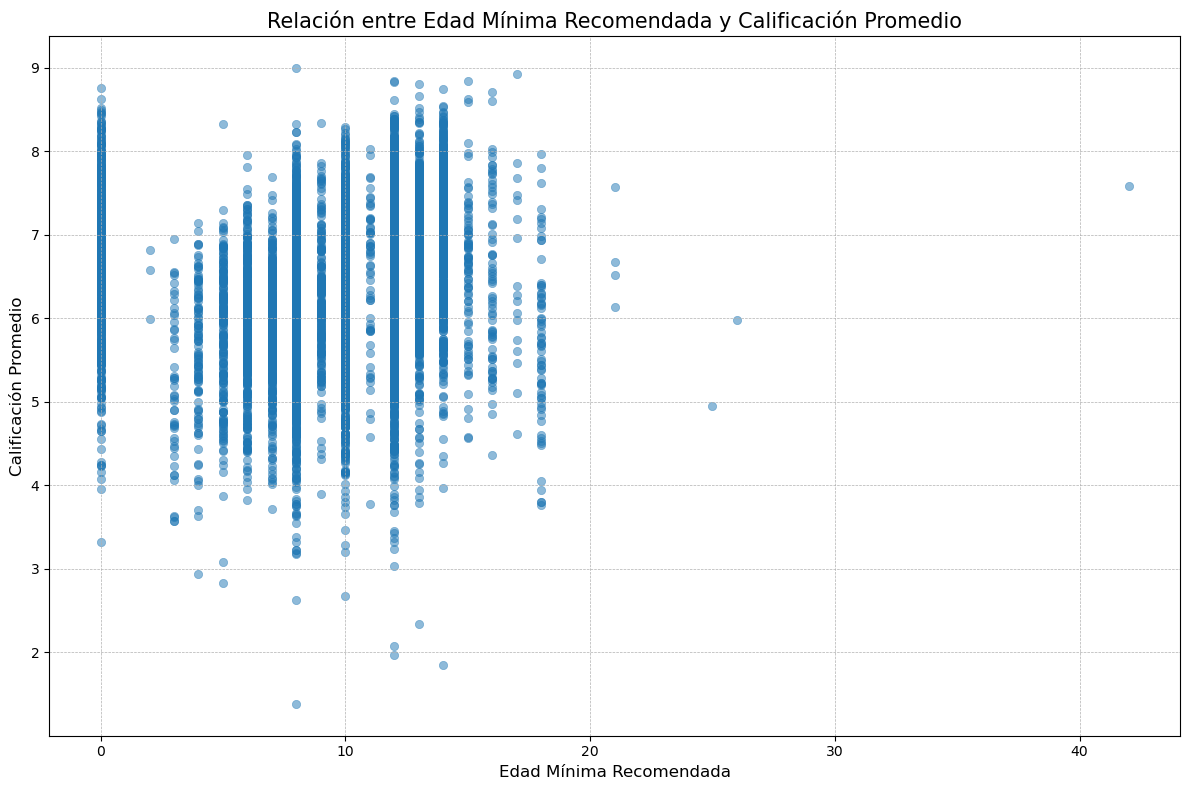

0.16777188771752852

In [38]:
# Visualización de la relación entre min_age y average_rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_games['min_age'], y=df_games['average_rating'], alpha=0.5, edgecolor=None)
plt.title('Relación entre Edad Mínima Recomendada y Calificación Promedio', fontsize=15)
plt.xlabel('Edad Mínima Recomendada', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calcular el coeficiente de correlación entre min_age y average_rating
correlation_coefficient_age_rating = df_games['min_age'].corr(df_games['average_rating'])
correlation_coefficient_age_rating

La visualización muestra la relación entre la "Edad Mínima Recomendada" y la "Calificación Promedio". Aunque los puntos están dispersos, parece haber una ligera tendencia ascendente, lo que indica que los juegos destinados a audiencias más maduras podrían tener calificaciones promedio ligeramente más altas.

El coeficiente de correlación entre "min_age" y "average_rating" es aproximadamente 0.1678. Aunque este valor no es extremadamente alto, indica una correlación positiva débil entre estas dos variables.

Racionalización del diseño de visualización:

Se eligió un gráfico de dispersión porque es adecuado para visualizar y evaluar la relación entre dos variables continuas.
Se utilizó un color suave y una baja opacidad para los puntos para mejorar la legibilidad en áreas donde los puntos están densamente agrupados.
Se agregaron líneas de cuadrícula para facilitar la lectura de valores en el gráfico.

Conclusión:

Hay una correlación positiva débil entre la edad mínima recomendada de un juego y su calificación promedio. Esto sugiere que los juegos destinados a audiencias más maduras pueden ser percibidos ligeramente más positivamente, aunque la relación no es muy fuerte. La empresa podría considerar esta información al seleccionar y promocionar juegos para la próxima temporada de invierno, especialmente si están buscando atraer a un público más maduro.

 "¿Ha habido una tendencia en las calificaciones promedio de los juegos a lo largo de los años?"

In [39]:
# Verificar la cantidad de valores nulos en la columna "year published"
null_count_year_published = df_games["year_published"].isnull().sum()

null_count_year_published

0

In [40]:
# Verificar la cantidad de valores nulos en la columna "average_rating"
null_count_average_rating = df_games["average_rating"].isnull().sum()

null_count_average_rating

0

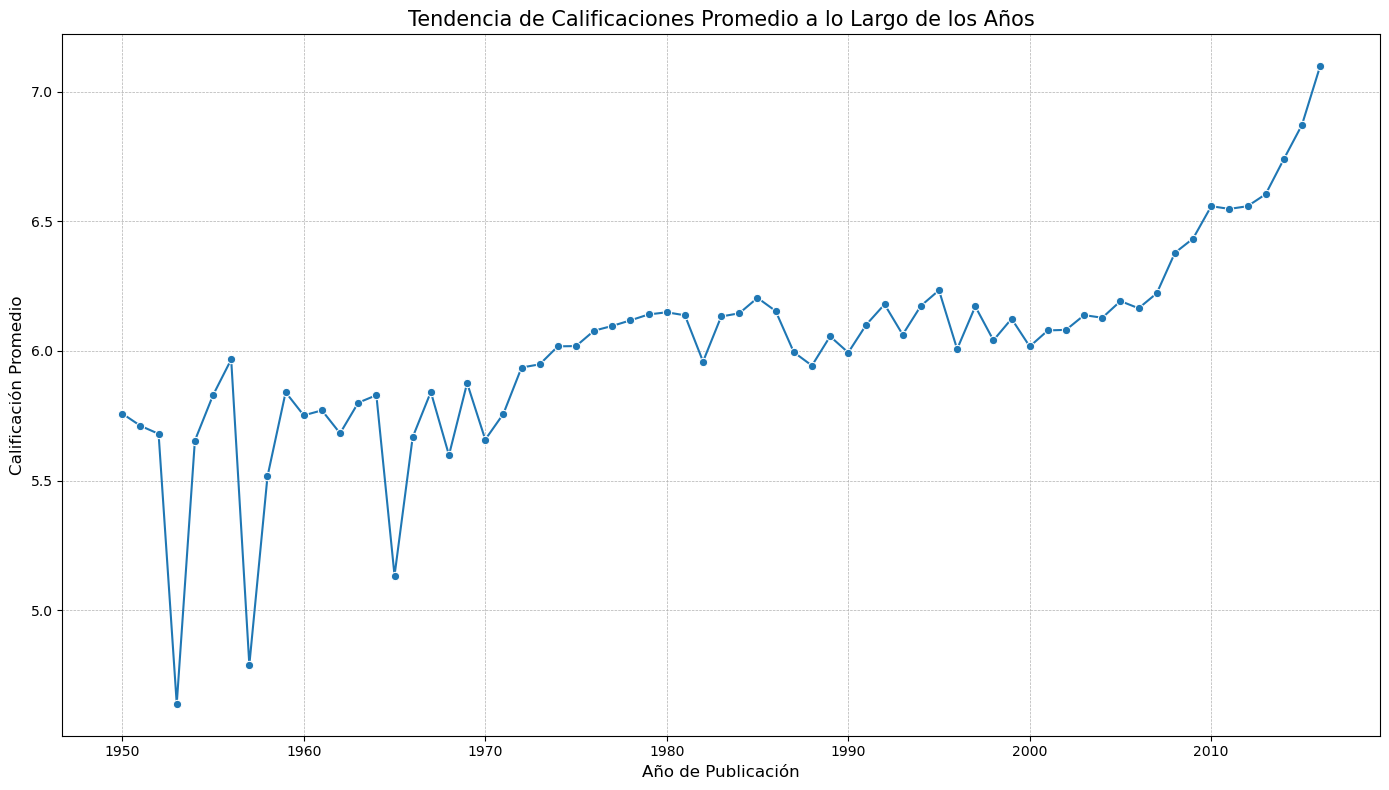

In [41]:
# Agrupar por año de publicación y calcular la calificación promedio para cada año
yearly_average_rating = df_games.groupby('year_published')['average_rating'].mean().reset_index()

# Filtrar años con datos insuficientes (por ejemplo, años muy antiguos con pocos juegos)
yearly_average_rating = yearly_average_rating[yearly_average_rating['year_published'] > 1900]

# Visualizar la tendencia de calificaciones promedio a lo largo de los años
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_average_rating, x='year_published', y='average_rating', marker='o')
plt.title('Tendencia de Calificaciones Promedio a lo Largo de los Años', fontsize=15)
plt.xlabel('Año de Publicación', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

El gráfico muestra la tendencia de las calificaciones promedio de los juegos de mesa a lo largo de los años. Como podemos observar:

Hubo una ligera disminución en las calificaciones promedio desde principios de la década de 1900 hasta aproximadamente la década de 1970.
Desde la década de 1970 hasta principios de la de 2000, las calificaciones promedio aumentaron gradualmente.
Después de la década de 2000, las calificaciones parecen haberse estabilizado y se mantienen en un rango más constante.

Racionalización del diseño de visualización:

Se eligió un gráfico de líneas porque es efectivo para mostrar tendencias a lo largo del tiempo.
Se filtraron los años con datos insuficientes para evitar interpretaciones erróneas debido a la falta de datos.
Se agregaron líneas de cuadrícula para facilitar la lectura de valores en el gráfico.
Se agregaron marcadores para cada punto de datos para resaltar los valores específicos de cada año.

Conclusión:

La tendencia muestra que las calificaciones promedio de los juegos han evolucionado a lo largo de los años, con un aumento notorio desde la década de 1970 hasta principios de la de 2000. Esta información puede ser valiosa para la empresa minorista al considerar estrategias de marketing o al elegir juegos para promocionar, ya que podría reflejar cambios en las preferencias o expectativas de los consumidores a lo largo del tiempo.

"¿Cuál es la relación entre el número de jugadores recomendados (tanto mínimo como máximo) y la calificación promedio del juego? Es decir, ¿los juegos diseñados para más jugadores tienden a tener calificaciones más altas?"

Justificación:

Durante la temporada de invierno, es probable que las personas se reúnan en grupos más grandes, ya sea con familiares o amigos. Si los juegos diseñados para más jugadores tienden a tener calificaciones más altas, podría indicar que estos juegos son más atractivos o mejor recibidos por un público más amplio. Identificar esta relación puede ayudar a la empresa minorista a decidir qué juegos promocionar o almacenar en mayores cantidades durante la temporada de invierno.

Para responder a esta pregunta, podemos realizar un análisis exploratorio visualizando la relación entre "min_players", "max_players" y "average_rating". También calcularemos el coeficiente de correlación para cuantificar la relación entre estas variables.

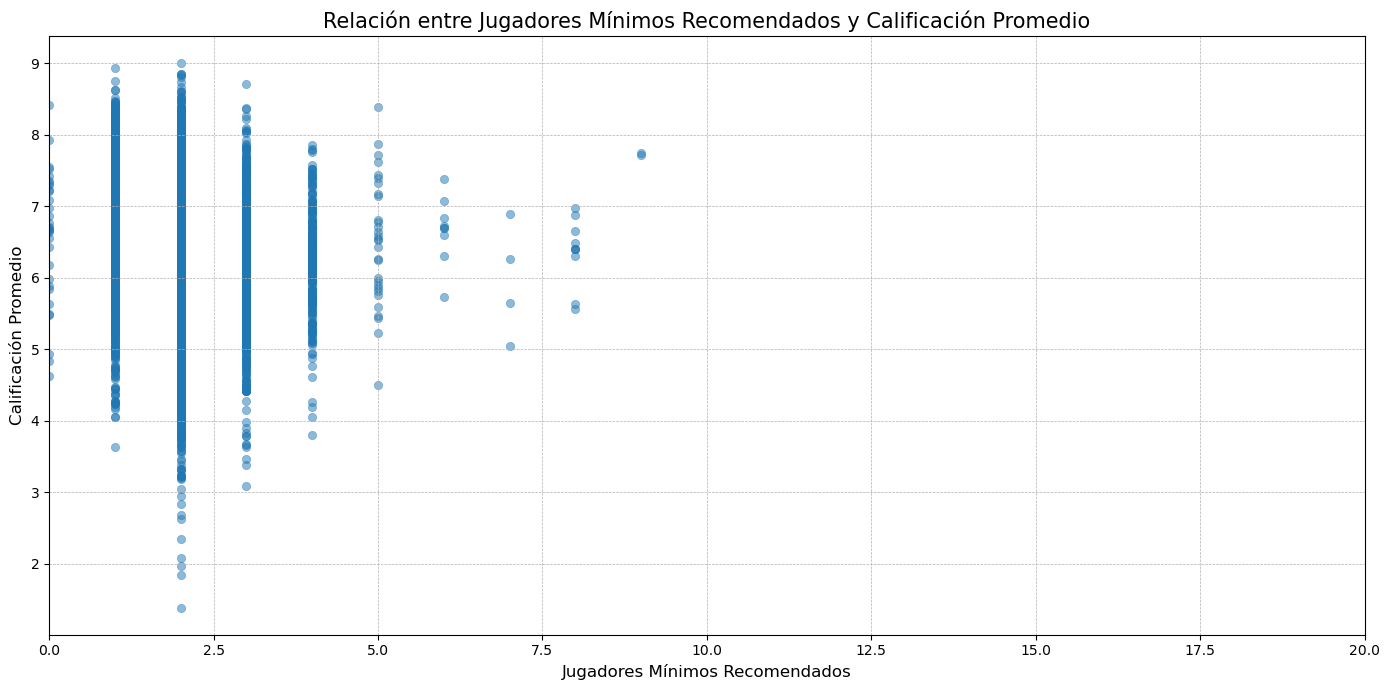

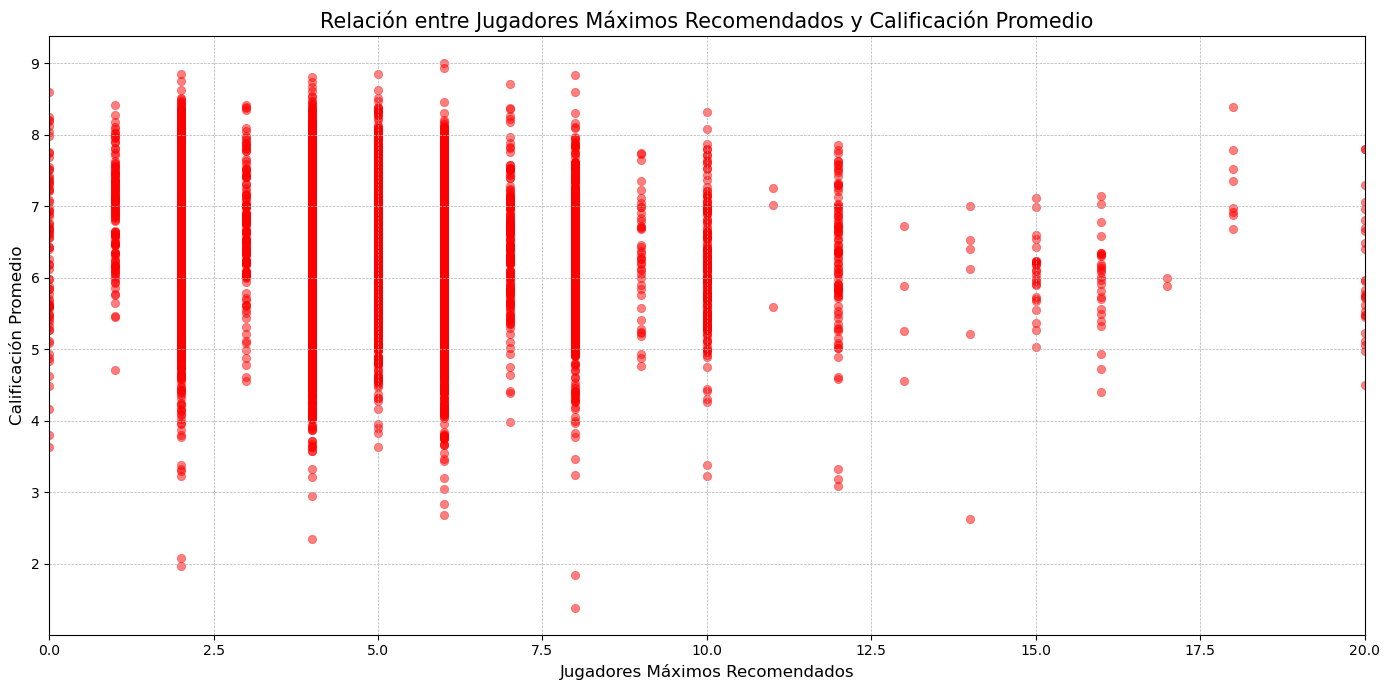

(-0.11787633906962296, -0.026563924860796548)

In [42]:
# Visualización de la relación entre min_players y average_rating
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_games, x='min_players', y='average_rating', alpha=0.5, edgecolor=None)
plt.title('Relación entre Jugadores Mínimos Recomendados y Calificación Promedio', fontsize=15)
plt.xlabel('Jugadores Mínimos Recomendados', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xlim(0, 20)  # Limitamos el eje x para visualizar mejor la mayoría de los puntos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Visualización de la relación entre max_players y average_rating
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_games, x='max_players', y='average_rating', alpha=0.5, edgecolor=None, color='red')
plt.title('Relación entre Jugadores Máximos Recomendados y Calificación Promedio', fontsize=15)
plt.xlabel('Jugadores Máximos Recomendados', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xlim(0, 20)  # Limitamos el eje x para visualizar mejor la mayoría de los puntos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calcular los coeficientes de correlación
correlation_min_players = df_games['min_players'].corr(df_games['average_rating'])
correlation_max_players = df_games['max_players'].corr(df_games['average_rating'])

correlation_min_players, correlation_max_players

Basándonos en los coeficientes de correlación:

La correlación entre "min_players" y "average_rating" es −0.1179. Esta es una correlación negativa débil, lo que sugiere que a medida que el número mínimo de jugadores recomendados aumenta, la calificación promedio tiende a disminuir ligeramente. Sin embargo, es importante destacar que el valor es cercano a 0, lo que indica que la relación es débil.
La correlación entre "max_players" y "average_rating" es −0.0266. Este valor es aún más cercano a 0, lo que indica una correlación muy débil o casi inexistente entre estas dos variables.
Interpretación:

Los juegos diseñados para un mayor número de jugadores mínimos no necesariamente tienden a tener calificaciones más altas. De hecho, hay una correlación negativa débil que sugiere lo contrario, aunque es tan débil que podría no ser significativa en la práctica.
Similarmente, la relación entre el número máximo de jugadores recomendados y las calificaciones promedio es esencialmente inexistente basándonos en el coeficiente de correlación.

Conclusión:

El número de jugadores recomendados, tanto mínimo como máximo, no parece ser un buen indicador de la calificación promedio de un juego. Por lo tanto, al planificar la estrategia para la próxima temporada de invierno, la empresa minorista no debería basar sus decisiones en el número de jugadores recomendados con la expectativa de que eso influirá significativamente en la popularidad o calificación de un juego.

In [43]:
# Calcular la correlación de "average_rating" con todas las otras columnas numéricas
correlation_with_average_rating = df_games.corr()['average_rating'].drop('average_rating')

# Encontrar la columna con la mayor correlación (en valor absoluto) con "average_rating"
max_corr_column = correlation_with_average_rating.abs().idxmax()
max_corr_value = correlation_with_average_rating[max_corr_column]

max_corr_column, max_corr_value

('game_id', 0.3458370227032994)

In [44]:
# Excluir "game_id" y calcular nuevamente la columna con la mayor correlación con "average_rating"
correlation_without_game_id = correlation_with_average_rating.drop('game_id')

# Encontrar la columna con la mayor correlación (en valor absoluto) con "average_rating" excluyendo "game_id"
max_corr_column_without_game_id = correlation_without_game_id.abs().idxmax()
max_corr_value_without_game_id = correlation_without_game_id[max_corr_column_without_game_id]

max_corr_column_without_game_id, max_corr_value_without_game_id

('year_published', 0.30835285403880325)

La columna que tiene la mayor correlación con "average_rating", excluyendo "game_id", es "year_published", con un coeficiente de correlación de aproximadamente 
0.3084
0.3084. Esto indica una correlación positiva moderada.

Esto sugiere que hay una relación entre el año de publicación de un juego y su calificación promedio. En particular, los juegos publicados más recientemente tienden a tener calificaciones promedio más altas.

Esta información puede ser valiosa para la empresa minorista, ya que indica una preferencia de los consumidores por los juegos más nuevos. Sin embargo, es importante considerar otros factores y no basar las decisiones únicamente en esta correlación.

In [45]:
# Ordenar las correlaciones en valor absoluto y tomar las 5 más altas excluyendo "game_id" y "year_published"
top_correlations = correlation_without_game_id.abs().sort_values(ascending=False).drop('year_published').head(5)

top_correlations

users_rated     0.227655
min_age         0.167772
min_players     0.117876
max_playtime    0.056439
playing_time    0.056439
Name: average_rating, dtype: float64

Después de "year_published", las columnas que tienen la mayor correlación con "average_rating", excluyendo "game_id", son:

"users_rated" con una correlación de 0.2277: Esta correlación positiva moderada sugiere que los juegos con más usuarios que los califican tienden a tener calificaciones promedio más altas. Esto podría deberse a que los juegos más populares y mejor calificados atraen a más usuarios para calificarlos.

"min_age" con una correlación de 0.1678: Esto indica una correlación positiva débil entre la edad mínima recomendada para un juego y su calificación promedio. Los juegos diseñados para audiencias más maduras podrían tener calificaciones más altas.

"min_players" con una correlación de 0.1179: Aunque la correlación es débil, sugiere que los juegos diseñados para más jugadores mínimos tienen una tendencia a calificaciones ligeramente más bajas.

"max_playtime" y "playing_time" con una correlación de 0.0564: Ambas columnas muestran una correlación débil con "average_rating". Esto sugiere que la duración máxima recomendada del juego y el tiempo promedio de juego tienen una influencia muy pequeña en la calificación promedio.


Estas correlaciones brindan una visión más amplia de las características de los juegos que pueden influir en su calificación promedio. Sin embargo, siempre es importante recordar que la correlación no implica causalidad, y estas relaciones deben interpretarse con cautela.

### Text Processing

In [46]:
# Lower case
df_games["description"] = df_games["description"].apply(lambda x: " ".join(x.lower() for x in x.split())) 
df_games["description"].head() 

0    die macher is a game about seven sequential po...
1    dragonmaster is a trick-taking card game based...
2    part of the knizia tile-laying trilogy, samura...
3    when you see the triangular box and the luxuri...
4    in acquire, each player strategically invests ...
Name: description, dtype: object

## Part3:
  
You must explain, in detail,    
•	why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)  
•	why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
•	what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
•	what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)  
